# Space Race Dataset

Dependencies

In [596]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

## Preliminary Data Analysis

In [597]:
data = pd.read_csv('all_space_mission_launches.csv')

In [598]:
data.head()

,Unnamed: 0,Organisation,Location,Datetime,Details,Rocket_Status,Price,Mission_Status
0,0,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri Feb 09, 2024 07:03 UTC",Soyuz 2.1v | Cosmos 2575,Active,NaN,Success
1,1,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA","Thu Feb 08, 2024 06:33 UTC",Falcon 9 Block 5 | PACE,Active,67.0,Success
2,2,CASC,"Bo Run Jiu Zhou Barge (Area 2), China Coastal ...","Sat Feb 03, 2024 03:06 UTC",Jielong-3 | 9 satellites,Active,NaN,Success
3,3,CASC,"LC-3, Xichang Satellite Launch Center, China","Fri Feb 02, 2024 23:37 UTC",Long March 2C | Geely Constellation Group 02,Active,30.8,Success
4,4,Rocket Lab,"Rocket Lab LC-1B, Māhia Peninsula, New Zealand","Wed Jan 31, 2024 06:34 UTC",Electron/Curie | Four Of A Kind,Active,7.5,Success


In [599]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6711 entries, 0 to 6710
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      6711 non-null   int64  
 1   Organisation    6711 non-null   object 
 2   Location        6711 non-null   object 
 3   Datetime        6711 non-null   object 
 4   Details         6711 non-null   object 
 5   Rocket_Status   6711 non-null   object 
 6   Price           2637 non-null   float64
 7   Mission_Status  6711 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 419.6+ KB


In [600]:
data['Rocket_Status'].unique()

array(['Active', 'Retired'], dtype=object)

## Data Cleaning

- Drop __Unnamed: 0__ Column it's Unnecesaary

In [601]:
data.drop(['Unnamed: 0'],inplace=True,axis=1)

- Make a new Column named __Country__ which is present in __Location__ Column

In [602]:
data['Country'] = data['Location'].str.split(', ').apply(lambda x: x[-1])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6711 entries, 0 to 6710
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    6711 non-null   object 
 1   Location        6711 non-null   object 
 2   Datetime        6711 non-null   object 
 3   Details         6711 non-null   object 
 4   Rocket_Status   6711 non-null   object 
 5   Price           2637 non-null   float64
 6   Mission_Status  6711 non-null   object 
 7   Country         6711 non-null   object 
dtypes: float64(1), object(7)
memory usage: 419.6+ KB


- Make __Datetime__ Column datetime datatype

In [603]:
# ...existing code...

def fix_datetime(dt):
    # If the last part after comma is a 4-digit year, append " 00:00 UTC"
    parts = dt.split(', ')
    if len(parts) > 1 and len(parts[-1]) == 4:
        return dt + " 00:00 UTC"
    return dt

data['Datetime'] = data['Datetime'].apply(fix_datetime)

In [604]:
data['Datetime'] = pd.to_datetime(data['Datetime'], errors='coerce')

In [605]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6711 entries, 0 to 6710
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    6711 non-null   object             
 1   Location        6711 non-null   object             
 2   Datetime        6711 non-null   datetime64[ns, UTC]
 3   Details         6711 non-null   object             
 4   Rocket_Status   6711 non-null   object             
 5   Price           2637 non-null   float64            
 6   Mission_Status  6711 non-null   object             
 7   Country         6711 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(6)
memory usage: 419.6+ KB


- Make a column __Year__ which contain year the rocket got launched

In [606]:
data['Year'] = data['Datetime'].dt.year

In [607]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6711 entries, 0 to 6710
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    6711 non-null   object             
 1   Location        6711 non-null   object             
 2   Datetime        6711 non-null   datetime64[ns, UTC]
 3   Details         6711 non-null   object             
 4   Rocket_Status   6711 non-null   object             
 5   Price           2637 non-null   float64            
 6   Mission_Status  6711 non-null   object             
 7   Country         6711 non-null   object             
 8   Year            6711 non-null   int32              
dtypes: datetime64[ns, UTC](1), float64(1), int32(1), object(6)
memory usage: 445.8+ KB


- Fill nan values in __Price__ Column with mean value

In [608]:
data['Price'] = data.groupby('Year')['Price'].transform(lambda x: x.fillna(x.mean()))
data.fillna({'Price': data['Price'].mean()},inplace= True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6711 entries, 0 to 6710
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    6711 non-null   object             
 1   Location        6711 non-null   object             
 2   Datetime        6711 non-null   datetime64[ns, UTC]
 3   Details         6711 non-null   object             
 4   Rocket_Status   6711 non-null   object             
 5   Price           6711 non-null   float64            
 6   Mission_Status  6711 non-null   object             
 7   Country         6711 non-null   object             
 8   Year            6711 non-null   int32              
dtypes: datetime64[ns, UTC](1), float64(1), int32(1), object(6)
memory usage: 445.8+ KB


## Exploratory Data Analysis

Font Properties

In [609]:
# Global style
plt.rcParams.update({
    # Font family and color
    "font.family": "DejaVu Sans",
    "text.color": "#111111",

    # Title
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "axes.titlecolor": "#111111",

    # Axis labels
    "axes.labelsize": 13,
    "axes.labelweight": "semibold",
    "axes.labelcolor": "#222222",

    # Tick labels
    "xtick.labelsize": 11,
    "xtick.color": "#333333",
    "ytick.labelsize": 11,
    "ytick.color": "#333333",

    # Grid style
    "grid.linestyle": "--",
    "grid.linewidth": 0.5,
    "grid.alpha": 0.6,

    # Legend
    "legend.frameon": False,
    "legend.fontsize": 11
})

- How many rockets Fly each year (use Datetime and use year if datetime not work)  (Time Series Analysis)

In [610]:
rocketsEachYear = data['Year'].value_counts().sort_index()

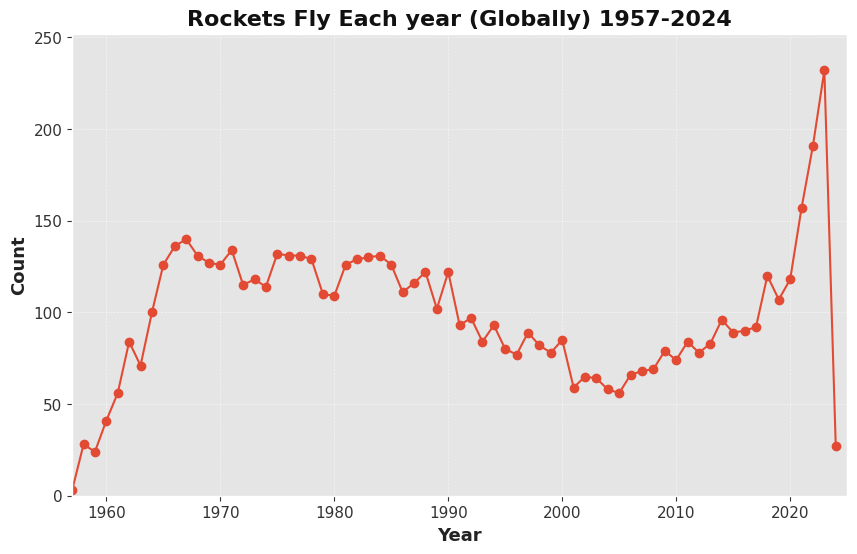

In [611]:
plt.figure(figsize=(10,6))
# plt.style.use('ggplot')
plt.title('Rockets Fly Each year (Globally) 1957-2024')
plt.plot(rocketsEachYear.index,rocketsEachYear, marker = 'o')
plt.xlabel('Year')
plt.ylabel('Count')

plt.xlim((1957,2025))
plt.ylim((0,max(rocketsEachYear)+20))

plt.show()

- How many Rockets fly each year by each Country (use Datetime and use year if datetime not work) (Time Series Analysis)

In [612]:
# Group by Year and Country, count launches
rockets_by_country_year = data.groupby(['Year', 'Country']).size().unstack(fill_value=0)

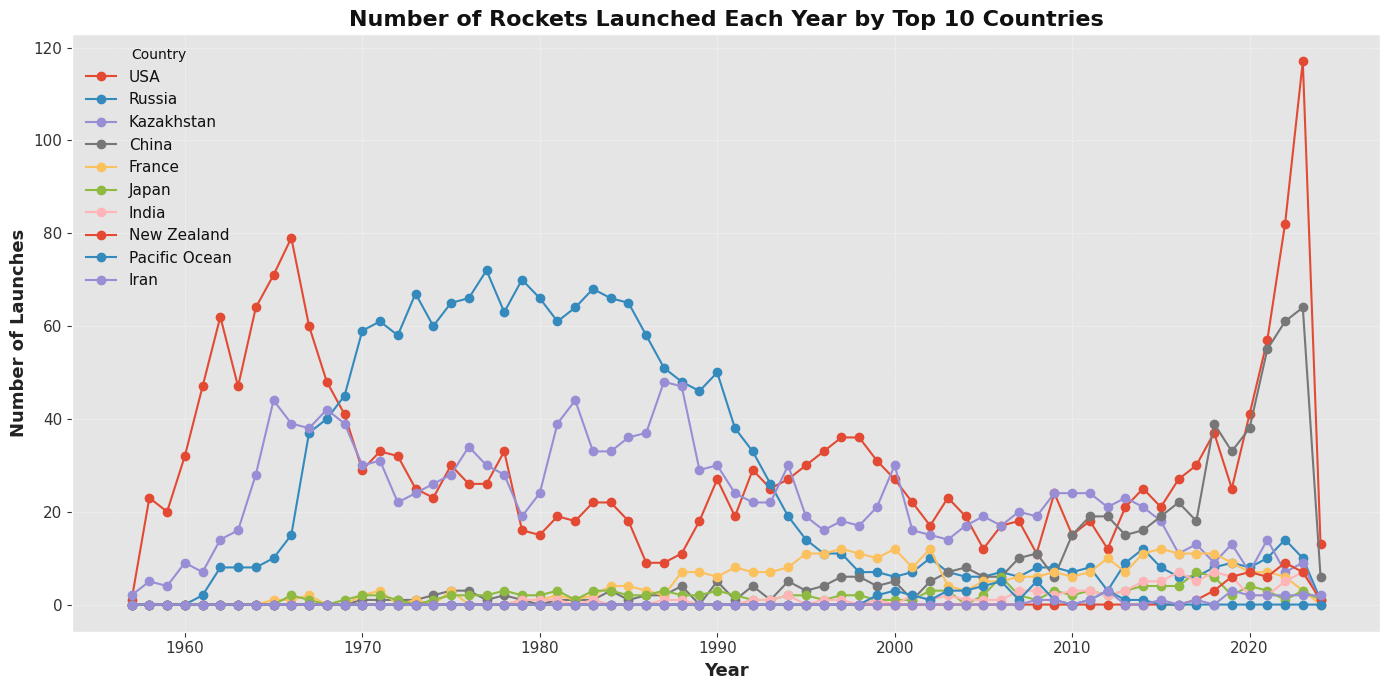

In [613]:
# Top 5 countries by total launches
top_countries = rockets_by_country_year.sum().sort_values(ascending=False).head(10).index
rockets_by_country_year[top_countries].plot(kind='line', marker='o', figsize=(14,7))
plt.title('Number of Rockets Launched Each Year by Top 10 Countries')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

- How many Rockets fly each year by each Organisation (Time Series Analysis)

In [614]:
# Group by Year and Country, count launches
rockets_by_organization_year = data.groupby(['Year', 'Organisation']).size().unstack(fill_value=0)

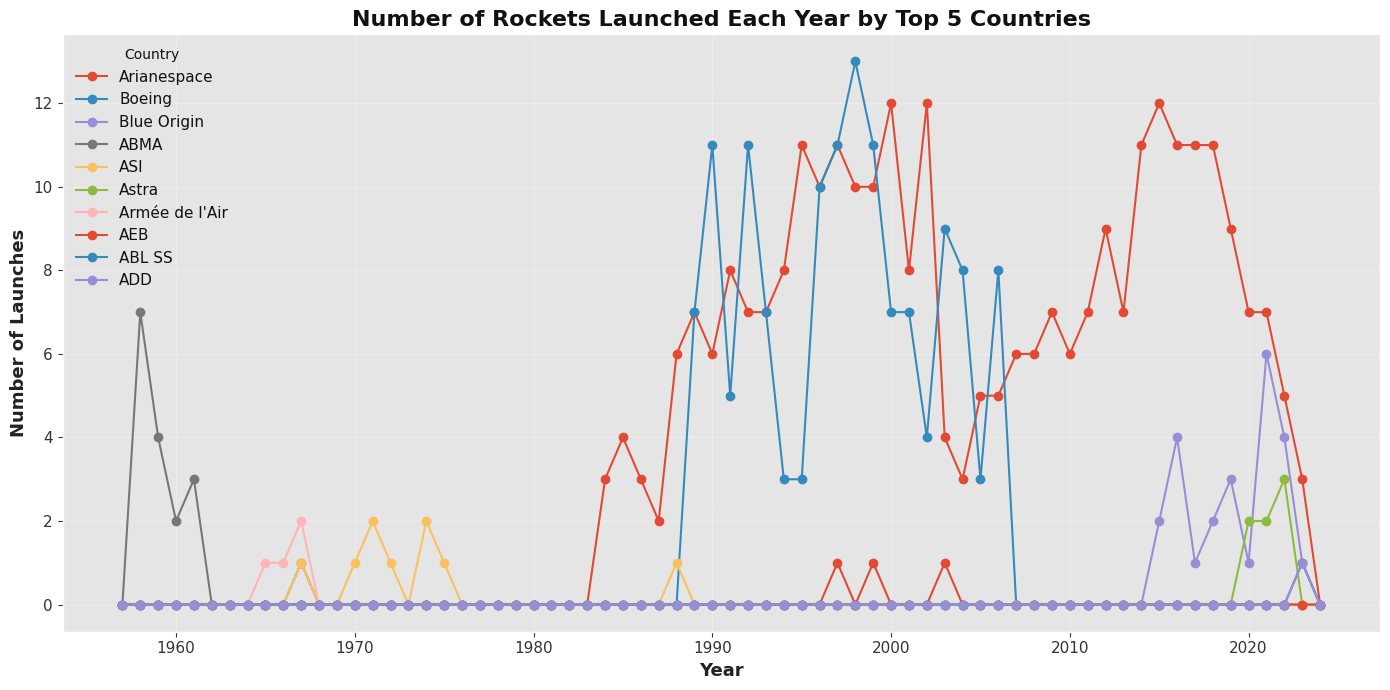

In [615]:
# Plot
top_organization = rockets_by_organization_year.sum().head(10).sort_values(ascending=False).index
rockets_by_organization_year[top_organization].plot(kind='line', marker='o', figsize=(14,7))
plt.title('Number of Rockets Launched Each Year by Top 5 Countries')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

- How much money is spend each year to fly rockets

In [616]:
price_by_year = data[['Year','Price']].groupby('Year').sum()['Price']

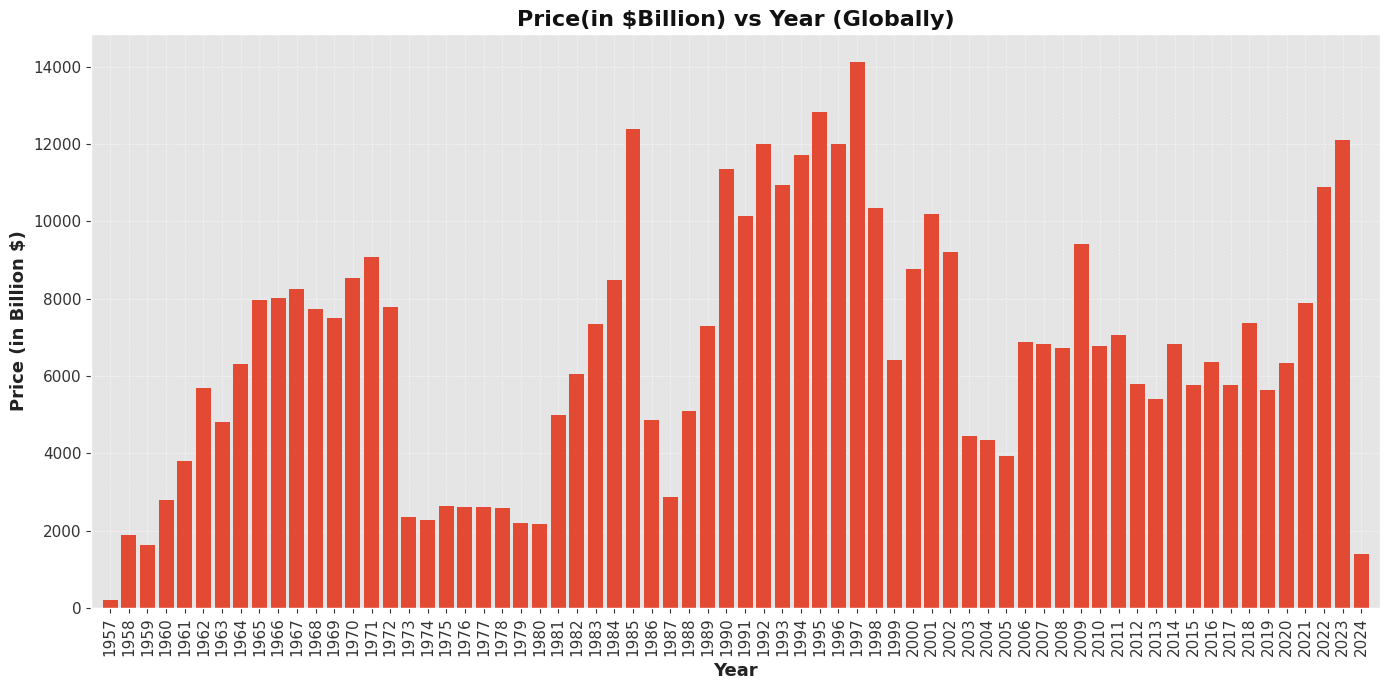

In [617]:
plt.figure(figsize=(14,7))
plt.title('Price(in $Billion) vs Year (Globally)')

plt.bar(price_by_year.index,price_by_year)
plt.xlim((min(price_by_year.index)-1,max(price_by_year.index)+1))
plt.xticks(rotation = 90,ticks = price_by_year.index)

plt.ylabel('Price (in Billion $)')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

What Happened in 1997 that countries spend so much

In 1997, while the intensity of the Space Race between the US and the Soviet Union had subsided, countries were still heavily investing in space programs for various reasons, including national prestige, technological advancement, and economic benefits. The Cold War rivalry had spurred significant investment, but even after its end, space exploration continued to be seen as a symbol of national power and a driver of technological innovation with potential for economic growth. 

- How much Money each organization spend each year to fly rockets

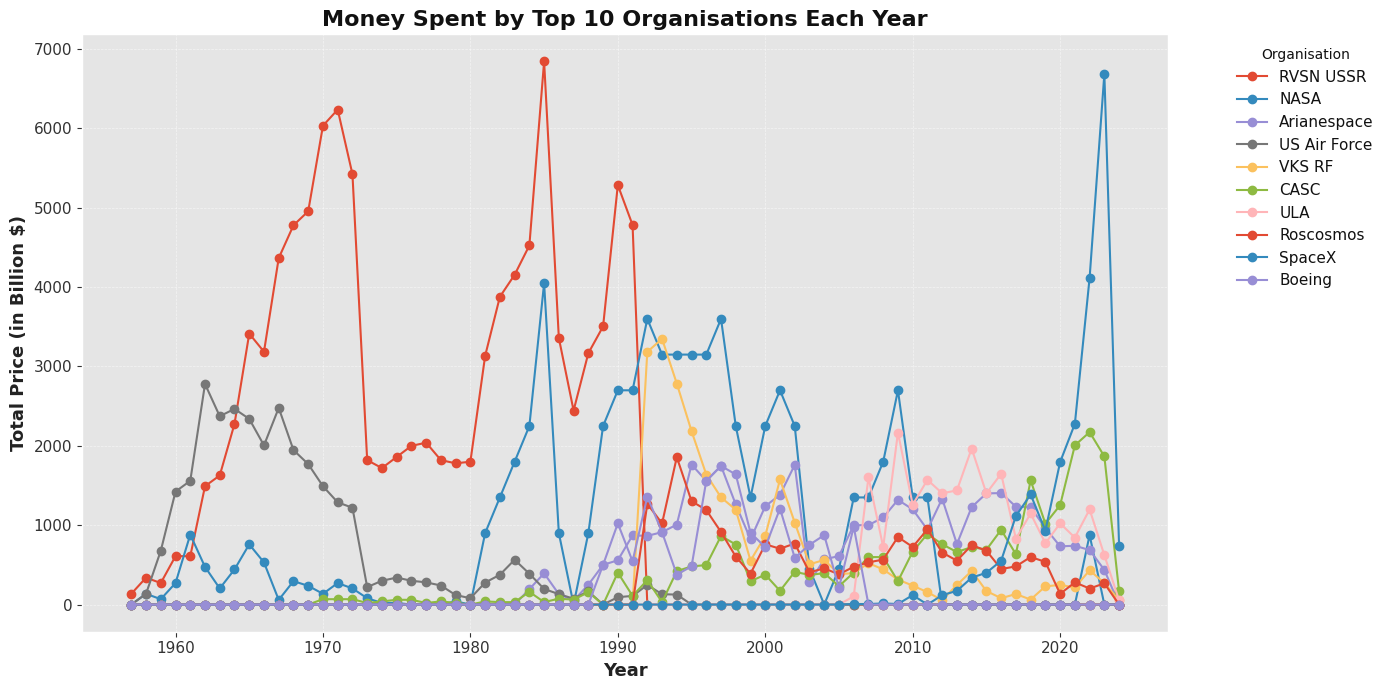

In [618]:
# Group by Organisation and Year, sum Price
org_year_price = data.groupby(['Year', 'Organisation'])['Price'].sum().unstack(fill_value=0)
# Optionally, select top N organisations by total spend
top_orgs = org_year_price.sum().sort_values(ascending=False).head(10).index
org_year_price_top = org_year_price[top_orgs]

# Plot using matplotlib
plt.figure(figsize=(14, 7))
for org in org_year_price_top.columns:
    plt.plot(org_year_price_top.index, org_year_price_top[org], marker='o', label=org)

plt.title('Money Spent by Top 10 Organisations Each Year')
plt.xlabel('Year')
plt.ylabel('Total Price (in Billion $)')
plt.legend(title='Organisation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- Totally How many Rockets are active and retired

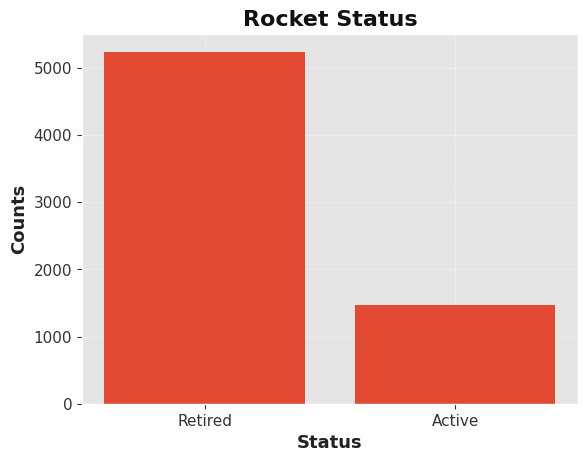

In [623]:
status = data['Rocket_Status'].value_counts()
plt.title('Rocket Status')

plt.bar(status.index,status)
plt.xlabel('Status')
plt.ylabel('Counts')

plt.show()

Why no. of Retired Rockets are more than Active

The number of retired rockets globally is indeed greater than the number of actively used rockets. This is primarily because rockets are designed to be either expendable (disposable after a single use) or reusable (capable of being refurbished and flown multiple times). Expendable rockets, which have been the standard for most of spaceflight history, leave stages and components in space or on Earth, contributing to a growing inventory of space debris and ocean waste. While reusable rockets like the Space Shuttle were developed to mitigate this issue, they faced challenges in cost and complexity, leading to their retirement. Despite advancements in reusable rocket technology, the legacy of expendable rockets continues to influence the current count of retired versus active launch vehicles. 

- How many Rockets are active and retired by each country

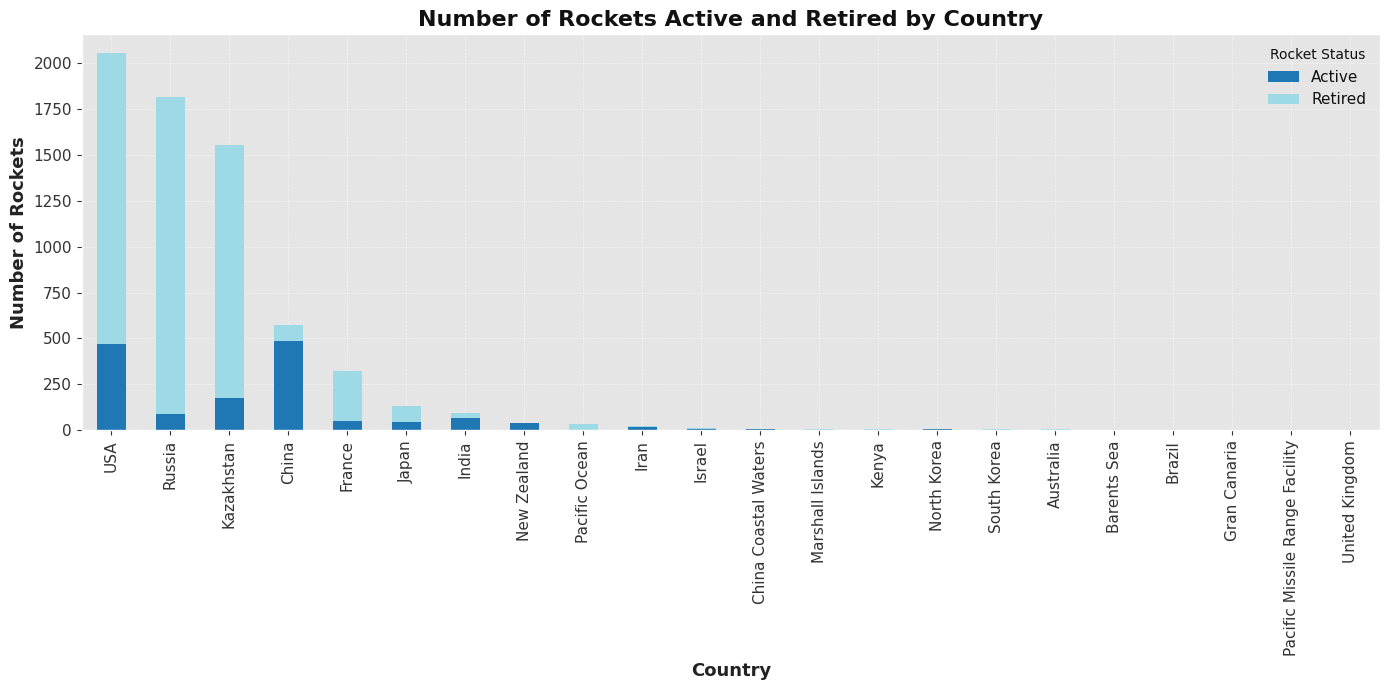

In [620]:
# Group by Country and Rocket_Status, count launches
country_status = data.groupby(['Country', 'Rocket_Status']).size().unstack(fill_value=0)

# Sort countries by total rockets (optional, for better visualization)
country_status = country_status.loc[country_status.sum(axis=1).sort_values(ascending=False).index]

# Plot as stacked bar chart
plt.figure(figsize=(14, 7))
country_status.plot(kind='bar', stacked=True, figsize=(14,7), colormap='tab20', ax=plt.gca())
plt.title('Number of Rockets Active and Retired by Country')
plt.xlabel('Country')
plt.ylabel('Number of Rockets')
plt.legend(title='Rocket Status')
plt.tight_layout()
plt.show()

- How much money each country lost each year if their mission status is not success

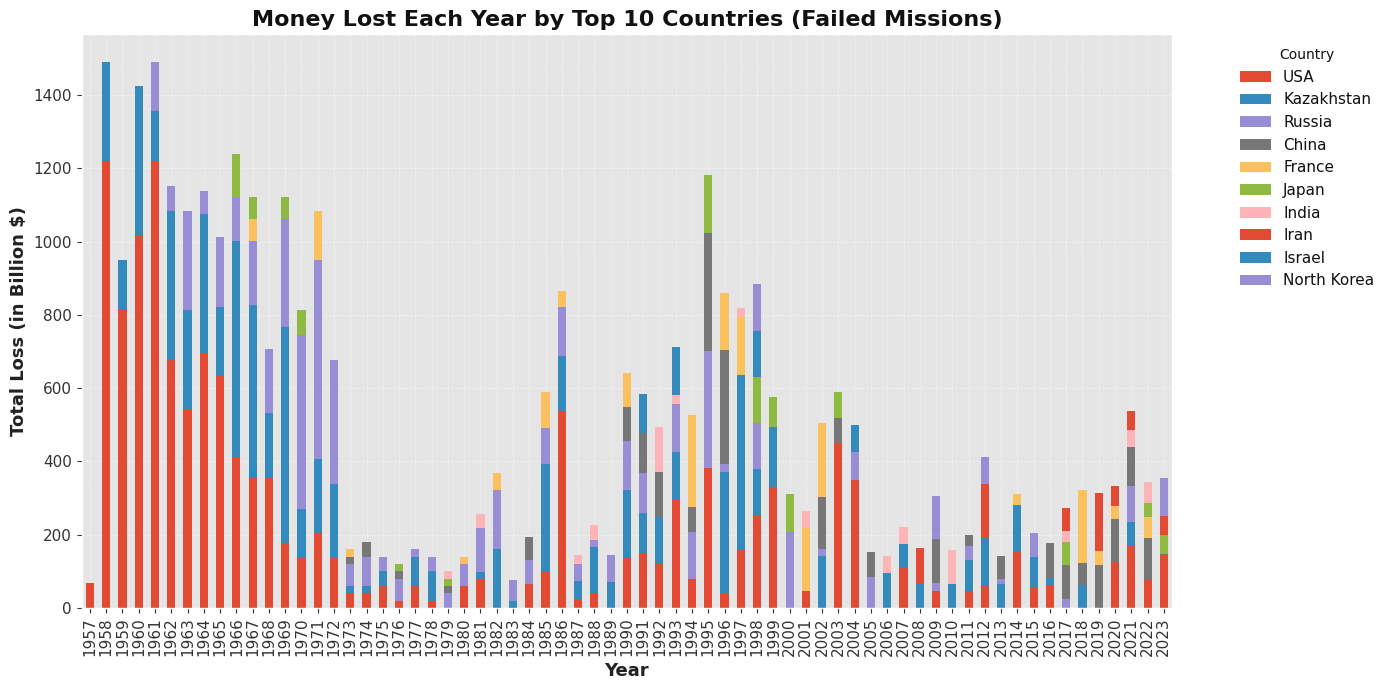

In [621]:
plt.figure(figsize=(14, 7))
country_loss_by_year[top_loss_countries].plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Money Lost Each Year by Top 10 Countries (Failed Missions)')
plt.xlabel('Year')
plt.ylabel('Total Loss (in Billion $)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
